In [2]:
# Análise de Dados do KubeMon - Dataset SVM

Este notebook contém análises dos dados coletados pelo sistema KubeMon para o algoritmo SVM (Support Vector Machine).

## Objetivos:
- Carregar e explorar o dataset svm.csv
- Realizar análise exploratória dos dados
- Visualizar métricas de CPU, memória, disco e rede
- Identificar padrões e anomalias
- Análise estatística das métricas do sistema

SyntaxError: invalid syntax (3029155348.py, line 3)

In [3]:
! pip install pandas matplotlib seaborn
! pip install plotly

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [6]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy import stats

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configurar para mostrar todas as colunas do DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## 1. Carregamento dos Dados

Vamos carregar o dataset e realizar uma primeira análise exploratória.

In [5]:
# Definir o caminho do arquivo
caminho_arquivo = r"svm.csv"

# Carregar o dataset
print("Carregando o dataset...")
try:
    # Carregar em chunks devido ao tamanho do arquivo
    chunk_size = 10000
    chunks = []
    
    for chunk in pd.read_csv(caminho_arquivo, chunksize=chunk_size):
        chunks.append(chunk)
    
    df = pd.concat(chunks, ignore_index=True)
    print(f"Dataset carregado com sucesso! Shape: {df.shape}")
    
except Exception as e:
    print(f"Erro ao carregar o dataset: {e}")
    # Alternativa: carregar uma amostra menor
    df = pd.read_csv(caminho_arquivo, nrows=50000)
    print(f"Carregada uma amostra de {df.shape[0]} linhas")

print(f"\nDimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")

Carregando o dataset...
Dataset carregado com sucesso! Shape: (80648, 126)

Dimensões do dataset: 80648 linhas x 126 colunas


In [5]:
# Informações básicas do dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Tamanho do dataset: {df.shape}")
print(f"Tipos de dados:")
print(df.dtypes.value_counts())
print(f"\nPrimeiras 5 linhas:")
df.head()

=== INFORMAÇÕES GERAIS DO DATASET ===
Tamanho do dataset: (80648, 126)
Tipos de dados:
float64    122
object       3
int64        1
Name: count, dtype: int64

Primeiras 5 linhas:


,mean_os_cpu_ctx_switches,mean_os_cpu_guest,mean_os_cpu_guest_nice,mean_os_cpu_idle,mean_os_cpu_interrupts,mean_os_cpu_iowait,mean_os_cpu_irq,mean_os_cpu_nice,mean_os_cpu_soft_interrupts,mean_os_cpu_softirq,mean_os_cpu_steal,mean_os_cpu_syscalls,mean_os_cpu_system,mean_os_cpu_user,mean_os_disk_discard_io,mean_os_disk_discard_merges,mean_os_disk_discard_sectors,mean_os_disk_discard_ticks,mean_os_disk_in_flight,mean_os_disk_io_ticks,mean_os_disk_read_io,mean_os_disk_read_merge,mean_os_disk_read_sectors,mean_os_disk_read_ticks,mean_os_disk_time_in_queue,mean_os_disk_write_io,mean_os_disk_write_merge,mean_os_disk_write_sectors,mean_os_disk_write_ticks,mean_os_mem_nr_active_anon,mean_os_mem_nr_active_file,mean_os_mem_nr_inactive_anon,mean_os_mem_nr_inactive_file,mean_os_mem_nr_mapped,mean_os_mem_pgfault,mean_os_mem_pgfree,mean_os_mem_pgmajfault,mean_os_mem_pgpgin,mean_os_mem_pgpgout,mean_os_mem_pgreuse,mean_os_net_bytes_recv,mean_os_net_bytes_sent,mean_os_net_dropin,mean_os_net_dropout,mean_os_net_errin,mean_os_net_errout,mean_os_net_num_connections,mean_os_net_packets_recv,mean_os_net_packets_sent,os_timestamp,node_name,mean_process_cpu_children_system,mean_process_cpu_children_user,mean_process_cpu_iowait,mean_process_cpu_system,mean_process_cpu_user,mean_process_disk_read_bytes,mean_process_disk_read_chars,mean_process_disk_read_count,mean_process_disk_write_bytes,mean_process_disk_write_chars,mean_process_disk_write_count,mean_process_mem_data,mean_process_mem_dt,mean_process_mem_lib,mean_process_mem_resident,mean_process_mem_shared,mean_process_mem_size,mean_process_mem_text,mean_process_net_rx_bytes,mean_process_net_rx_compressed,mean_process_net_rx_drop,mean_process_net_rx_errs,mean_process_net_rx_fifo,mean_process_net_rx_frame,mean_process_net_rx_multicast,mean_process_net_rx_packets,mean_process_net_tx_bytes,mean_process_net_tx_carrier,mean_process_net_tx_colls,mean_process_net_tx_compressed,mean_process_net_tx_drop,mean_process_net_tx_errs,mean_process_net_tx_fifo,mean_process_net_tx_packets,mean_container_cpu_nr_periods,mean_container_cpu_nr_throttled,mean_container_cpu_system,mean_container_cpu_throttled_time,mean_container_cpu_user,mean_container_disk_8:0_async,mean_container_disk_8:0_discard,mean_container_disk_8:0_read,mean_container_disk_8:0_sync,mean_container_disk_8:0_total,mean_container_disk_8:0_write,mean_container_mem_active_anon,mean_container_mem_active_file,mean_container_mem_cache,mean_container_mem_inactive_anon,mean_container_mem_inactive_file,mean_container_mem_mapped_file,mean_container_mem_pgfault,mean_container_mem_pgmajfault,mean_container_mem_pgpgin,mean_container_mem_pgpgout,mean_container_mem_rss,mean_container_mem_unevictable,mean_container_net_rx_bytes,mean_container_net_rx_compressed,mean_container_net_rx_drop,mean_container_net_rx_errs,mean_container_net_rx_fifo,mean_container_net_rx_frame,mean_container_net_rx_multicast,mean_container_net_rx_packets,mean_container_net_tx_bytes,mean_container_net_tx_carrier,mean_container_net_tx_colls,mean_container_net_tx_compressed,mean_container_net_tx_drop,mean_container_net_tx_errs,mean_container_net_tx_fifo,mean_container_net_tx_packets,iteration,target
0,22270.0,0.0,0.0,34.31,15074.0,0.00,0.0,0.0,6218.0,0.08,0.0,0.0,2.30,4.36,0.0,0.0,0.0,0.0,0.0,80.0,30.0,0.0,592.0,45.0,61.0,24.0,46.0,944.0,15.0,6.0,6.0,34297.0,-622.0,859.0,133497.0,96295.0,0.0,296.0,472.0,4364.0,1798.0,15909.0,0.0,0.0,0.0,0.0,79.0,20.0,19.0,2022-12-05 10:59:09,node1-5,0.0,0.0,0.0,0.0044,0.0056,0.0,4.442222e+02,6.8889,13198.2222,5965.0,3.1111,0.0,0.0,0.0,1.2222,0.0,0.0,0.0,1.841111e+03,0.0,0.0,0.0,0.0,0.0,0.0,14.1111,3.606444e+03,0.0,0.0,0.0,0.0,0.0,0.0,16.1111,0.0,0.0,35.0,0.0,77.4,18022.4,0.0,60620.8,60620.8,78643.2,18022.4,4096.0,5734.4,-506265.6,25707315.2,-512000.0,587366.4,24988.8,0.0,22721.6,16564.2,25726976.0,0.0,1786.4,0.0,0.0,0.0,0.0,0.0,0.0,13.2,2346.2,0.0,0.0,0.0,0.0,0.0,0.0,15.8,0,normal
1,26634.0,0.0,0.0,26.51,22188.0,0.00,0.0,0.0,14863.0,0.98,0.0,0.0,2.50,11.77,0.0,0.0,0

In [7]:
# Análise das colunas do dataset
print("=== ANÁLISE DAS COLUNAS ===")
print(f"Total de colunas: {len(df.columns)}")

# Separar colunas por categoria
colunas_cpu = [col for col in df.columns if 'cpu' in col.lower()]
colunas_memoria = [col for col in df.columns if 'mem' in col.lower()]
colunas_disco = [col for col in df.columns if 'disk' in col.lower()]
colunas_rede = [col for col in df.columns if 'net' in col.lower()]
colunas_container = [col for col in df.columns if 'container' in col.lower()]
colunas_os = [col for col in df.columns if 'os_' in col.lower()]
colunas_processo = [col for col in df.columns if 'process' in col.lower()]

print(f"Colunas de CPU: {len(colunas_cpu)}")
print(f"Colunas de Memória: {len(colunas_memoria)}")
print(f"Colunas de Disco: {len(colunas_disco)}")
print(f"Colunas de Rede: {len(colunas_rede)}")
print(f"Colunas de Container: {len(colunas_container)}")
print(f"Colunas de SO: {len(colunas_os)}")
print(f"Colunas de Processo: {len(colunas_processo)}")

print(f"\nColunas especiais:")
print(f"- os_timestamp: {('os_timestamp' in df.columns)}")
print(f"- node_name: {('node_name' in df.columns)}")
print(f"- iteration: {('iteration' in df.columns)}")
print(f"- target: {('target' in df.columns)}")

=== ANÁLISE DAS COLUNAS ===
Total de colunas: 126
Colunas de CPU: 24
Colunas de Memória: 30
Colunas de Disco: 27
Colunas de Rede: 41
Colunas de Container: 39
Colunas de SO: 50
Colunas de Processo: 34

Colunas especiais:
- os_timestamp: True
- node_name: True
- iteration: True
- target: True


## 2. Análise Exploratória dos Dados

=== ANÁLISE DA VARIÁVEL TARGET ===
Distribuição das classes:
target
interf    45660
normal    34988
Name: count, dtype: int64

Percentual por classe:
target
interf    56.616407
normal    43.383593
Name: proportion, dtype: float64


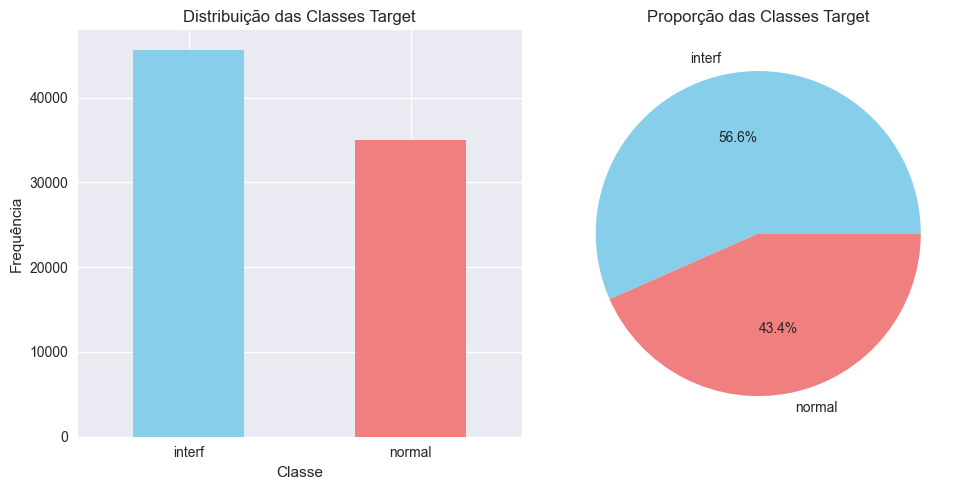

In [8]:
# Análise da variável target
print("=== ANÁLISE DA VARIÁVEL TARGET ===")
if 'target' in df.columns:
    target_counts = df['target'].value_counts()
    print("Distribuição das classes:")
    print(target_counts)
    print(f"\nPercentual por classe:")
    print(df['target'].value_counts(normalize=True) * 100)
    
    # Visualizar distribuição das classes
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    target_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
    plt.title('Distribuição das Classes Target')
    plt.xlabel('Classe')
    plt.ylabel('Frequência')
    plt.xticks(rotation=0)
    
    plt.subplot(1, 2, 2)
    plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', 
            colors=['skyblue', 'lightcoral'])
    plt.title('Proporção das Classes Target')
    
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'target' não encontrada no dataset")

In [8]:
# Análise de valores ausentes e estatísticas descritivas
print("=== ANÁLISE DE VALORES AUSENTES ===")
valores_ausentes = df.isnull().sum()
if valores_ausentes.sum() > 0:
    print("Colunas com valores ausentes:")
    print(valores_ausentes[valores_ausentes > 0])
else:
    print("Não há valores ausentes no dataset")

print(f"\n=== ESTATÍSTICAS DESCRITIVAS ===")
# Selecionar apenas colunas numéricas para estatísticas
colunas_numericas = df.select_dtypes(include=[np.number]).columns
print(f"Colunas numéricas: {len(colunas_numericas)}")

# Estatísticas básicas
estatisticas = df[colunas_numericas].describe()
print("Estatísticas básicas das principais métricas:")
estatisticas

=== ANÁLISE DE VALORES AUSENTES ===
Não há valores ausentes no dataset

=== ESTATÍSTICAS DESCRITIVAS ===
Colunas numéricas: 123
Estatísticas básicas das principais métricas:


,mean_os_cpu_ctx_switches,mean_os_cpu_guest,mean_os_cpu_guest_nice,mean_os_cpu_idle,mean_os_cpu_interrupts,mean_os_cpu_iowait,mean_os_cpu_irq,mean_os_cpu_nice,mean_os_cpu_soft_interrupts,mean_os_cpu_softirq,mean_os_cpu_steal,mean_os_cpu_syscalls,mean_os_cpu_system,mean_os_cpu_user,mean_os_disk_discard_io,mean_os_disk_discard_merges,mean_os_disk_discard_sectors,mean_os_disk_discard_ticks,mean_os_disk_in_flight,mean_os_disk_io_ticks,mean_os_disk_read_io,mean_os_disk_read_merge,mean_os_disk_read_sectors,mean_os_disk_read_ticks,mean_os_disk_time_in_queue,mean_os_disk_write_io,mean_os_disk_write_merge,mean_os_disk_write_sectors,mean_os_disk_write_ticks,mean_os_mem_nr_active_anon,mean_os_mem_nr_active_file,mean_os_mem_nr_inactive_anon,mean_os_mem_nr_inactive_file,mean_os_mem_nr_mapped,mean_os_mem_pgfault,mean_os_mem_pgfree,mean_os_mem_pgmajfault,mean_os_mem_pgpgin,mean_os_mem_pgpgout,mean_os_mem_pgreuse,mean_os_net_bytes_recv,mean_os_net_bytes_sent,mean_os_net_dropin,mean_os_net_dropout,mean_os_net_errin,mean_os_net_errout,mean_os_net_num_connections,mean_os_net_packets_recv,mean_os_net_packets_sent,mean_process_cpu_children_system,mean_process_cpu_children_user,mean_process_cpu_iowait,mean_process_cpu_system,mean_process_cpu_user,mean_process_disk_read_bytes,mean_process_disk_read_chars,mean_process_disk_read_count,mean_process_disk_write_bytes,mean_process_disk_write_chars,mean_process_disk_write_count,mean_process_mem_data,mean_process_mem_dt,mean_process_mem_lib,mean_process_mem_resident,mean_process_mem_shared,mean_process_mem_size,mean_process_mem_text,mean_process_net_rx_bytes,mean_process_net_rx_compressed,mean_process_net_rx_drop,mean_process_net_rx_errs,mean_process_net_rx_fifo,mean_process_net_rx_frame,mean_process_net_rx_multicast,mean_process_net_rx_packets,mean_process_net_tx_bytes,mean_process_net_tx_carrier,mean_process_net_tx_colls,mean_process_net_tx_compressed,mean_process_net_tx_drop,mean_process_net_tx_errs,mean_process_net_tx_fifo,mean_process_net_tx_packets,mean_container_cpu_nr_periods,mean_container_cpu_nr_throttled,mean_container_cpu_system,mean_container_cpu_throttled_time,mean_container_cpu_user,mean_container_disk_8:0_async,mean_container_disk_8:0_discard,mean_container_disk_8:0_read,mean_container_disk_8:0_sync,mean_container_disk_8:0_total,mean_container_disk_8:0_write,mean_container_mem_active_anon,mean_container_mem_active_file,mean_container_mem_cache,mean_container_mem_inactive_anon,mean_container_mem_inactive_file,mean_container_mem_mapped_file,mean_container_mem_pgfault,mean_container_mem_pgmajfault,mean_container_mem_pgpgin,mean_container_mem_pgpgout,mean_container_mem_rss,mean_container_mem_unevictable,mean_container_net_rx_bytes,mean_container_net_rx_compressed,mean_container_net_rx_drop,mean_container_net_rx_errs,mean_container_net_rx_fifo,mean_container_net_rx_frame,mean_container_net_rx_multicast,mean_container_net_rx_packets,mean_container_net_tx_bytes,mean_container_net_tx_carrier,mean_container_net_tx_colls,mean_container_net_tx_compressed,mean_container_net_tx_drop,mean_container_net_tx_errs,mean_container_net_tx_fifo,mean_container_net_tx_packets,iteration
count,80648.000000,80648.0,80648.0,80648.000000,80648.000000,80648.000000,80648.0,80648.000000,80648.000000,80648.000000,80648.0,80648.0,80648.000000,80648.000000,80648.0,80648.0,80648.0,80648.0,80648.000000,80648.000000,80648.000000,80648.000000,8.064800e+04,80648.000000,80648.000000,80648.000000,80648.000000,8.064800e+04,80648.000000,80648.000000,80648.000000,8.064800e+04,80648.000000,80648.000000,80648.000000,8.064800e+04,80648.000000,8.064800e+04,8.064800e+04,80648.000000,80648.000000,80648.00000,80648.000000,80648.0,80648.0,80648.0,80648.000000,80648.000000,80648.000000,80648.000000,80648.000000,80648.0,80648.000000,80648.000000,8.064800e+04,8.064800e+04,80648.000000,8.064800e+04,8.064800e+04,80648.000000,80648.000000,80648.0,80648.0,80648.000000,80648.000000,80648.000000,80648.0,8.064800e+04,80648.0,80648.000000,80648.0,80648.0

## 3. Análise Temporal

=== ANÁLISE TEMPORAL ===
Período dos dados:
Início: 2022-12-05 10:59:09
Fim: 2022-12-10 13:56:28
Duração: 5 days 02:57:19

Nós monitorados:
node_name
node3      26884
node4      26883
node1-5    26881
Name: count, dtype: int64


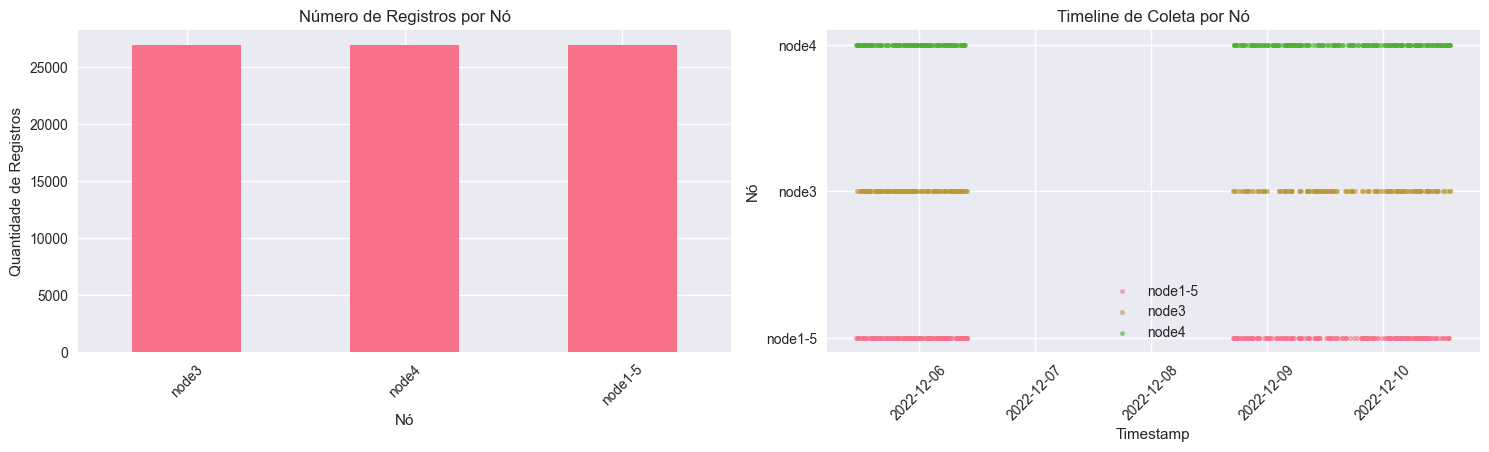

In [9]:
# Análise temporal dos dados
if 'os_timestamp' in df.columns:
    print("=== ANÁLISE TEMPORAL ===")
    
    # Converter timestamp para datetime
    df['timestamp'] = pd.to_datetime(df['os_timestamp'])
    
    # Informações temporais
    print(f"Período dos dados:")
    print(f"Início: {df['timestamp'].min()}")
    print(f"Fim: {df['timestamp'].max()}")
    print(f"Duração: {df['timestamp'].max() - df['timestamp'].min()}")
    
    # Análise por nó
    if 'node_name' in df.columns:
        print(f"\nNós monitorados:")
        node_counts = df['node_name'].value_counts()
        print(node_counts)
        
        # Visualizar distribuição temporal por nó
        plt.figure(figsize=(15, 8))
        
        plt.subplot(2, 2, 1)
        node_counts.plot(kind='bar')
        plt.title('Número de Registros por Nó')
        plt.xlabel('Nó')
        plt.ylabel('Quantidade de Registros')
        plt.xticks(rotation=45)
        
        # Timeline de coleta de dados
        plt.subplot(2, 2, 2)
        df_sample = df.sample(min(1000, len(df)))  # Amostra para visualização
        for node in df['node_name'].unique():
            node_data = df_sample[df_sample['node_name'] == node]
            plt.scatter(node_data['timestamp'], [node]*len(node_data), 
                       alpha=0.6, label=node, s=10)
        
        plt.title('Timeline de Coleta por Nó')
        plt.xlabel('Timestamp')
        plt.ylabel('Nó')
        plt.legend()
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
else:
    print("Coluna 'os_timestamp' não encontrada no dataset")

## 4. Análise das Métricas de Sistema

=== ANÁLISE DAS MÉTRICAS DE CPU ===
Métricas de CPU disponíveis: ['mean_os_cpu_user', 'mean_os_cpu_system', 'mean_os_cpu_idle', 'mean_os_cpu_iowait', 'mean_os_cpu_interrupts']

Estatísticas das métricas de CPU:
       mean_os_cpu_user  mean_os_cpu_system  mean_os_cpu_idle  mean_os_cpu_iowait  mean_os_cpu_interrupts
count      80648.000000        80648.000000      80648.000000        80648.000000            80648.000000
mean           1.966793            1.765561         38.547638            0.027808            33543.080312
std            2.253563            1.499230          4.162210            0.433194            25117.191709
min            0.140000            0.240000          5.080000            0.000000             5678.000000
25%            0.790000            0.870000         37.730000            0.000000            17375.000000
50%            1.140000            1.230000         39.610000            0.000000            25538.500000
75%            1.860000            1.940000    

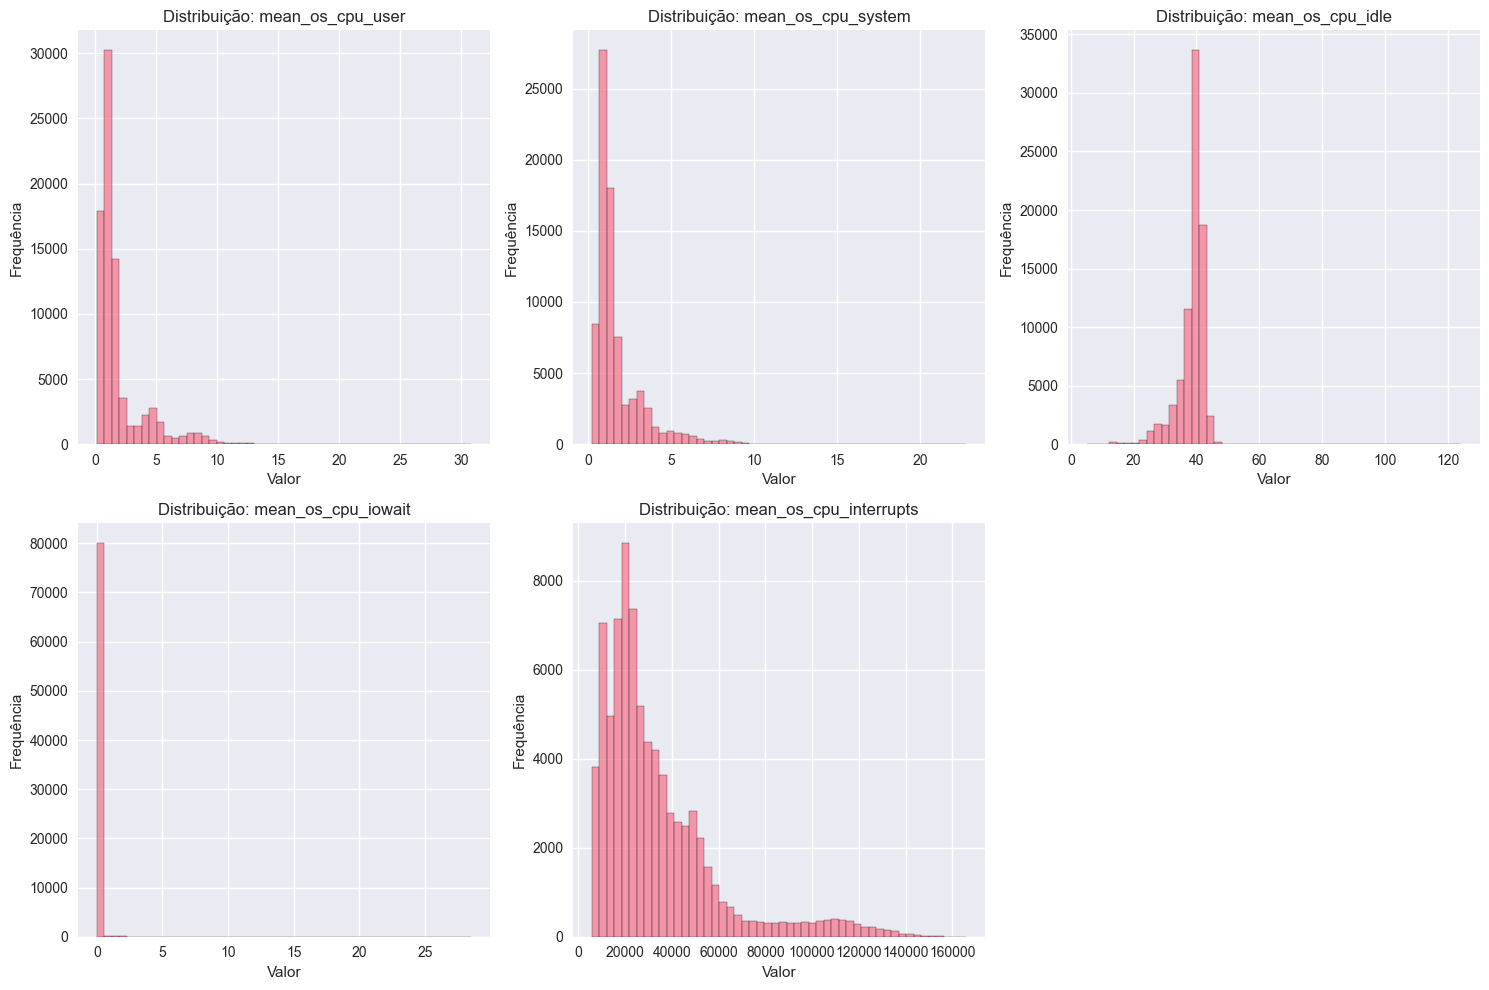

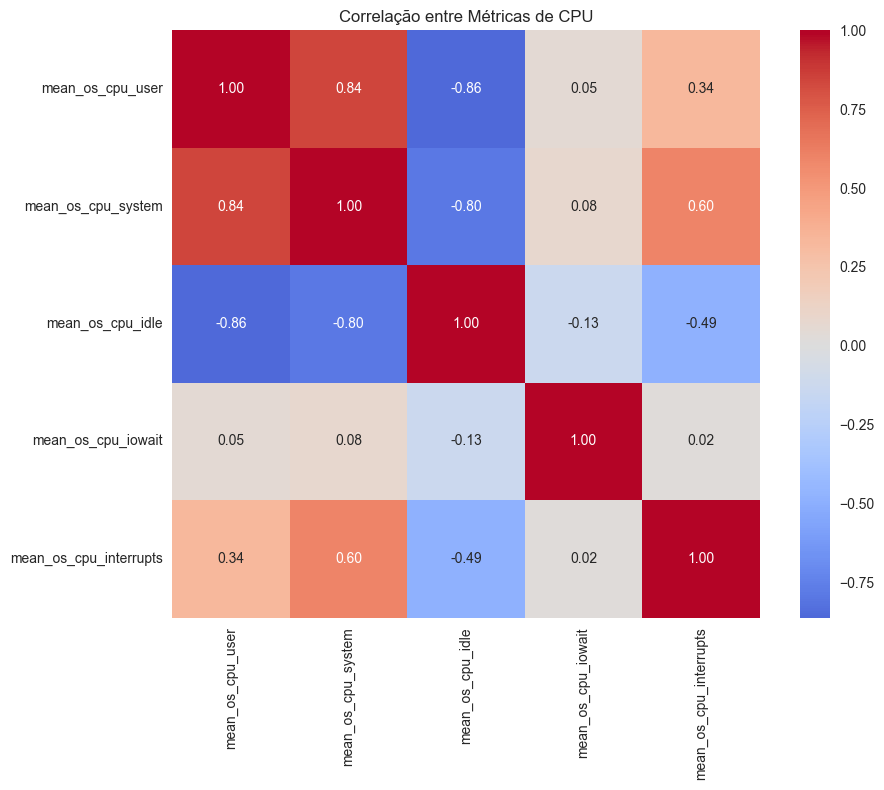

In [10]:
# Análise das métricas de CPU
print("=== ANÁLISE DAS MÉTRICAS DE CPU ===")

# Principais métricas de CPU do SO
metricas_cpu_principais = [
    'mean_os_cpu_user', 'mean_os_cpu_system', 'mean_os_cpu_idle', 
    'mean_os_cpu_iowait', 'mean_os_cpu_interrupts'
]

# Verificar quais métricas existem no dataset
metricas_cpu_existentes = [col for col in metricas_cpu_principais if col in df.columns]

if metricas_cpu_existentes:
    print(f"Métricas de CPU disponíveis: {metricas_cpu_existentes}")
    
    # Estatísticas das métricas de CPU
    print("\nEstatísticas das métricas de CPU:")
    print(df[metricas_cpu_existentes].describe())
    
    # Visualização das métricas de CPU
    plt.figure(figsize=(15, 10))
    
    for i, metrica in enumerate(metricas_cpu_existentes[:6], 1):
        plt.subplot(2, 3, i)
        df[metrica].hist(bins=50, alpha=0.7, edgecolor='black')
        plt.title(f'Distribuição: {metrica}')
        plt.xlabel('Valor')
        plt.ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()
    
    # Correlação entre métricas de CPU
    if len(metricas_cpu_existentes) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = df[metricas_cpu_existentes].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                    square=True, fmt='.2f')
        plt.title('Correlação entre Métricas de CPU')
        plt.tight_layout()
        plt.show()
        
else:
    print("Nenhuma métrica de CPU principal encontrada")

=== ANÁLISE DAS MÉTRICAS DE MEMÓRIA ===
Métricas de Memória disponíveis: 8

Estatísticas das métricas de Memória (top 5):
       mean_os_mem_nr_active_anon  mean_os_mem_nr_active_file  mean_os_mem_nr_inactive_anon  mean_os_mem_nr_inactive_file  mean_process_mem_resident
count                80648.000000                80648.000000                  8.064800e+04                  80648.000000               80648.000000
mean                     0.085830                  102.683687                  8.950056e+02                   -454.269393                   2.791527
std                      2.360006                 8171.952052                  6.353560e+04                   8384.097746                  60.647647
min                   -171.000000              -293644.000000                 -1.157080e+06                -400255.000000                -753.200000
25%                     -1.000000                    1.000000                  1.800000e+02                   -269.000000            

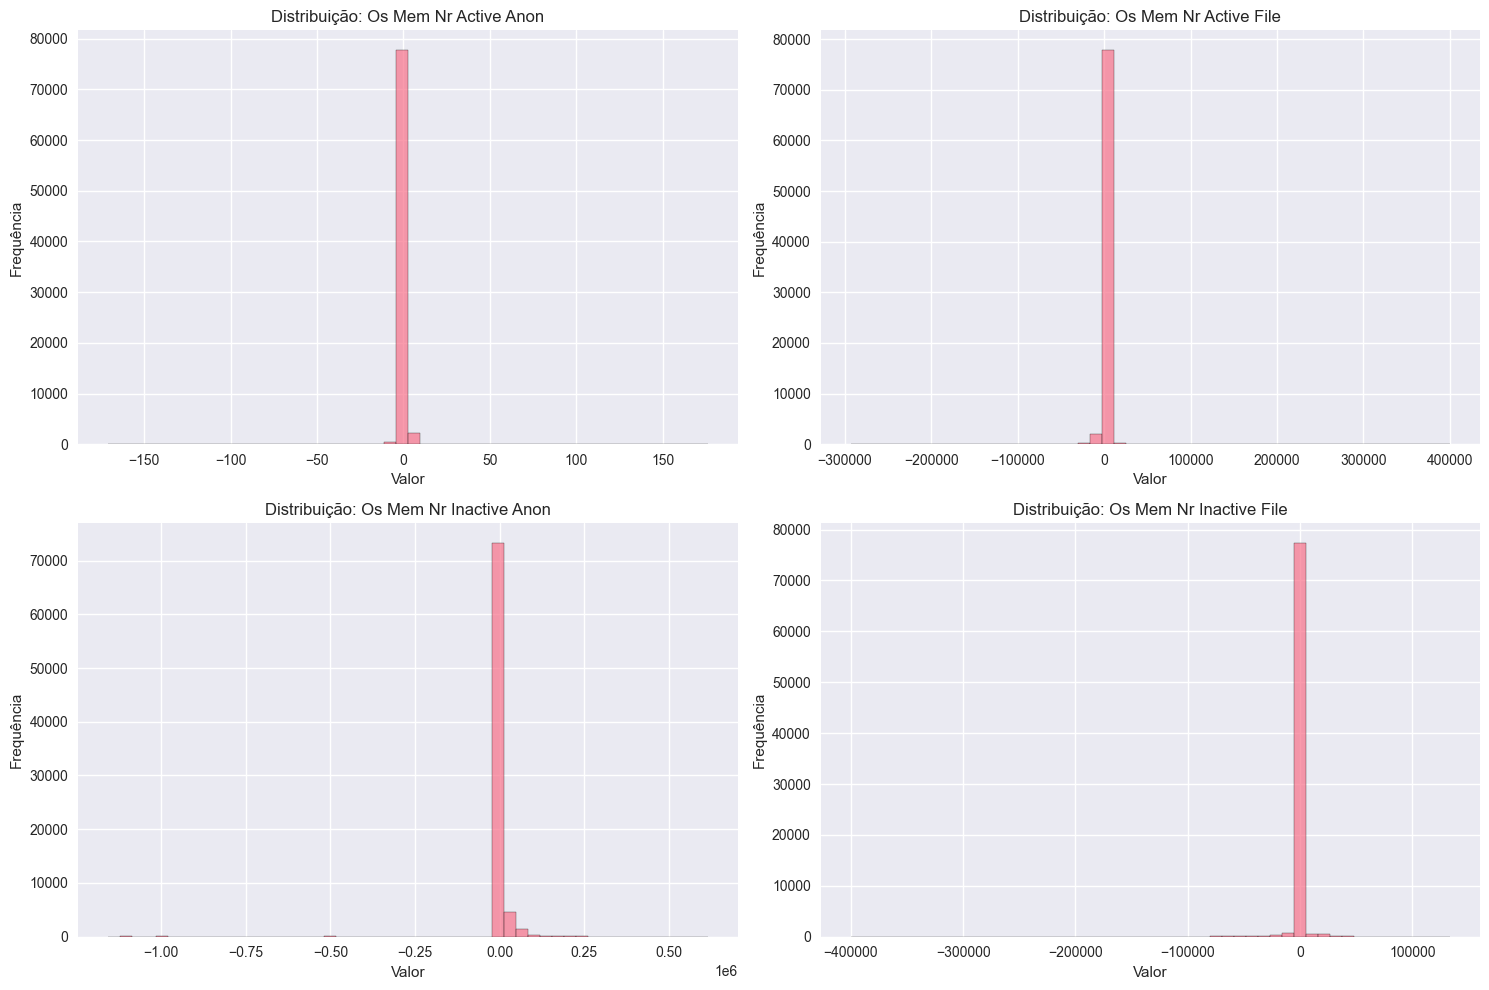

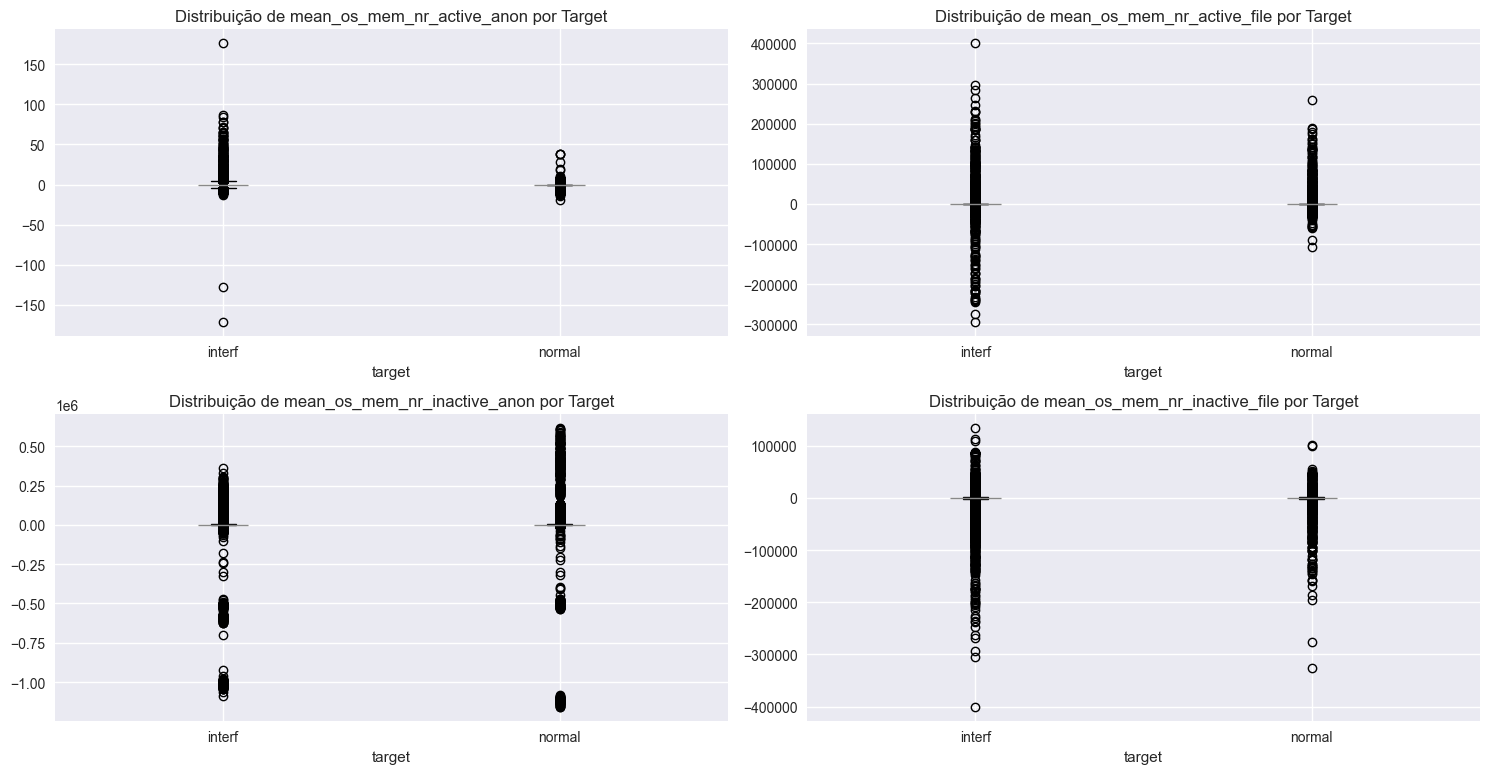

In [11]:
# Análise das métricas de Memória
print("=== ANÁLISE DAS MÉTRICAS DE MEMÓRIA ===")

# Principais métricas de memória
metricas_memoria_principais = [
    'mean_os_mem_nr_active_anon', 'mean_os_mem_nr_active_file',
    'mean_os_mem_nr_inactive_anon', 'mean_os_mem_nr_inactive_file',
    'mean_process_mem_resident', 'mean_process_mem_size',
    'mean_container_mem_rss', 'mean_container_mem_cache'
]

# Verificar quais métricas existem no dataset
metricas_memoria_existentes = [col for col in metricas_memoria_principais if col in df.columns]

if metricas_memoria_existentes:
    print(f"Métricas de Memória disponíveis: {len(metricas_memoria_existentes)}")
    
    # Estatísticas das métricas de memória
    print("\nEstatísticas das métricas de Memória (top 5):")
    print(df[metricas_memoria_existentes[:5]].describe())
    
    # Visualização das métricas de memória
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, metrica in enumerate(metricas_memoria_existentes[:4]):
        df[metrica].hist(bins=50, alpha=0.7, edgecolor='black', ax=axes[i])
        axes[i].set_title(f'Distribuição: {metrica.replace("mean_", "").replace("_", " ").title()}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()
    
    # BoxPlot das métricas de memória por classe target
    if 'target' in df.columns and len(metricas_memoria_existentes) >= 2:
        plt.figure(figsize=(15, 8))
        
        for i, metrica in enumerate(metricas_memoria_existentes[:4], 1):
            plt.subplot(2, 2, i)
            df.boxplot(column=metrica, by='target', ax=plt.gca())
            plt.title(f'Distribuição de {metrica} por Target')
            plt.suptitle('')  # Remove o título automático
        
        plt.tight_layout()
        plt.show()
        
else:
    print("Nenhuma métrica de memória principal encontrada")

=== ANÁLISE DAS MÉTRICAS DE REDE ===
Métricas de Rede disponíveis: 8

Estatísticas das métricas de Rede:
       mean_os_net_bytes_recv  mean_os_net_bytes_sent  mean_os_net_packets_recv  mean_os_net_packets_sent  mean_container_net_rx_bytes  mean_container_net_tx_bytes  mean_process_net_rx_bytes  mean_process_net_tx_bytes
count            80648.000000             80648.00000              80648.000000              80648.000000                 8.064800e+04                 8.064800e+04               8.064800e+04               8.064800e+04
mean              1802.057026             17172.79046                 20.284744                 19.627492                 2.775638e+07                 2.898789e+07               1.691463e+07               1.528220e+07
std                145.184603              6154.38316                  2.132588                  1.800464                 5.247378e+07                 6.416579e+07               3.930820e+07               4.289245e+07
min               1581.

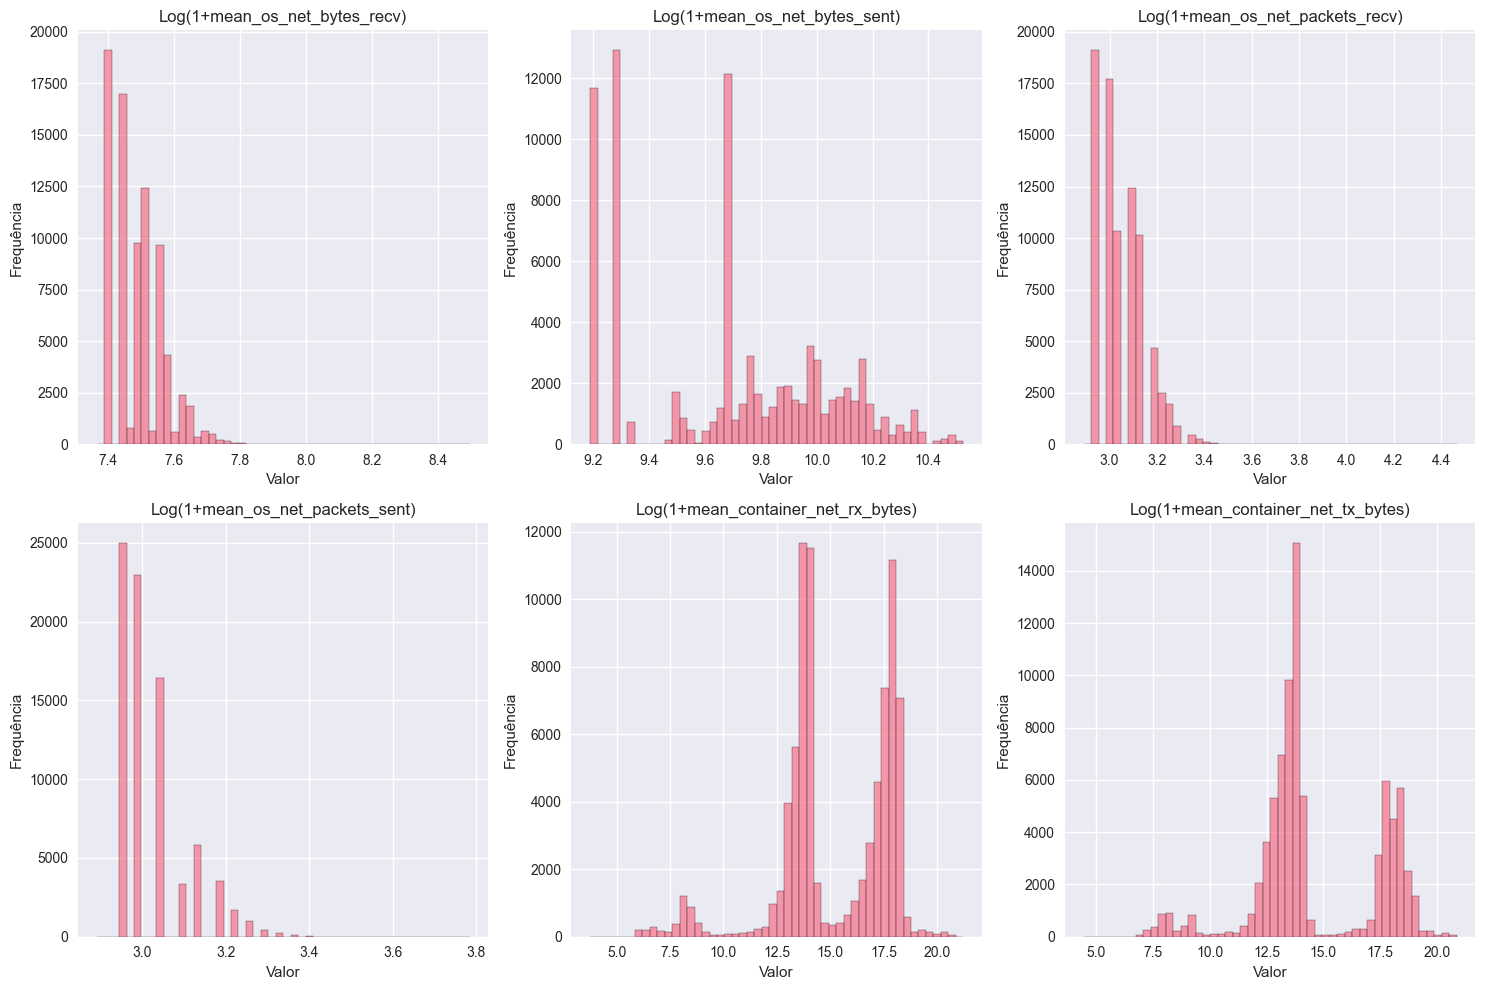

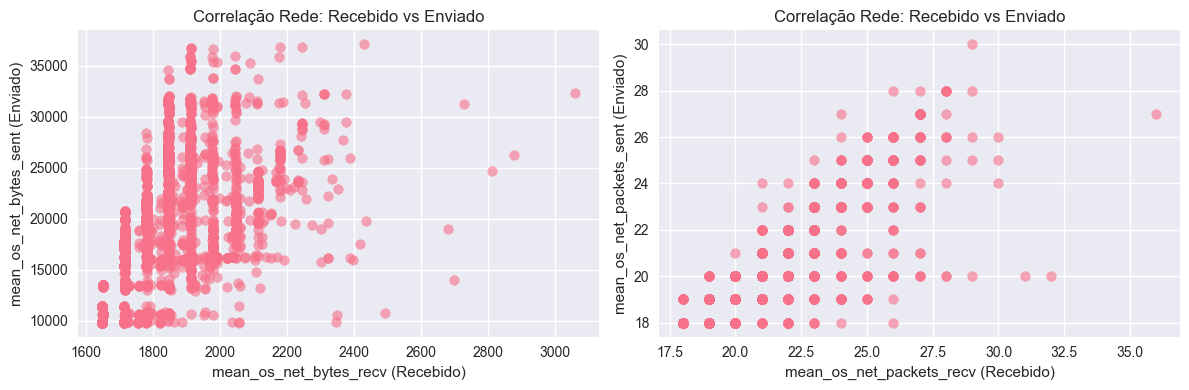

In [12]:
# Análise das métricas de Rede
print("=== ANÁLISE DAS MÉTRICAS DE REDE ===")

# Principais métricas de rede
metricas_rede_principais = [
    'mean_os_net_bytes_recv', 'mean_os_net_bytes_sent',
    'mean_os_net_packets_recv', 'mean_os_net_packets_sent',
    'mean_container_net_rx_bytes', 'mean_container_net_tx_bytes',
    'mean_process_net_rx_bytes', 'mean_process_net_tx_bytes'
]

# Verificar quais métricas existem no dataset
metricas_rede_existentes = [col for col in metricas_rede_principais if col in df.columns]

if metricas_rede_existentes:
    print(f"Métricas de Rede disponíveis: {len(metricas_rede_existentes)}")
    
    # Estatísticas das métricas de rede
    print("\nEstatísticas das métricas de Rede:")
    print(df[metricas_rede_existentes].describe())
    
    # Visualização das métricas de rede
    plt.figure(figsize=(15, 10))
    
    for i, metrica in enumerate(metricas_rede_existentes[:6], 1):
        plt.subplot(2, 3, i)
        # Usar log scale devido aos valores potencialmente grandes
        valores = df[metrica]
        valores_positivos = valores[valores > 0]
        if len(valores_positivos) > 0:
            plt.hist(np.log1p(valores_positivos), bins=50, alpha=0.7, edgecolor='black')
            plt.title(f'Log(1+{metrica})')
        else:
            plt.hist(valores, bins=50, alpha=0.7, edgecolor='black')
            plt.title(f'Distribuição: {metrica}')
        plt.xlabel('Valor')
        plt.ylabel('Frequência')
    
    plt.tight_layout()
    plt.show()
    
    # Análise de correlação entre recebido e enviado
    bytes_recv_cols = [col for col in metricas_rede_existentes if 'recv' in col or 'rx' in col]
    bytes_sent_cols = [col for col in metricas_rede_existentes if 'sent' in col or 'tx' in col]
    
    if bytes_recv_cols and bytes_sent_cols:
        plt.figure(figsize=(12, 4))
        
        for i, (recv_col, sent_col) in enumerate(zip(bytes_recv_cols[:2], bytes_sent_cols[:2]), 1):
            plt.subplot(1, 2, i)
            # Usar amostra para scatter plot se o dataset for muito grande
            sample_size = min(5000, len(df))
            df_sample = df.sample(sample_size)
            plt.scatter(df_sample[recv_col], df_sample[sent_col], alpha=0.6)
            plt.xlabel(f'{recv_col} (Recebido)')
            plt.ylabel(f'{sent_col} (Enviado)')
            plt.title(f'Correlação Rede: Recebido vs Enviado')
        
        plt.tight_layout()
        plt.show()
        
else:
    print("Nenhuma métrica de rede principal encontrada")

## 5. Detecção de Anomalias e Outliers

=== DETECÇÃO DE OUTLIERS ===
Resumo de Outliers por Métrica:
mean_os_cpu_user: 12904 outliers (16.00%)
mean_os_cpu_system: 8183 outliers (10.15%)
mean_os_mem_nr_active_anon: 1093 outliers (1.36%)
mean_os_mem_nr_active_file: 17441 outliers (21.63%)


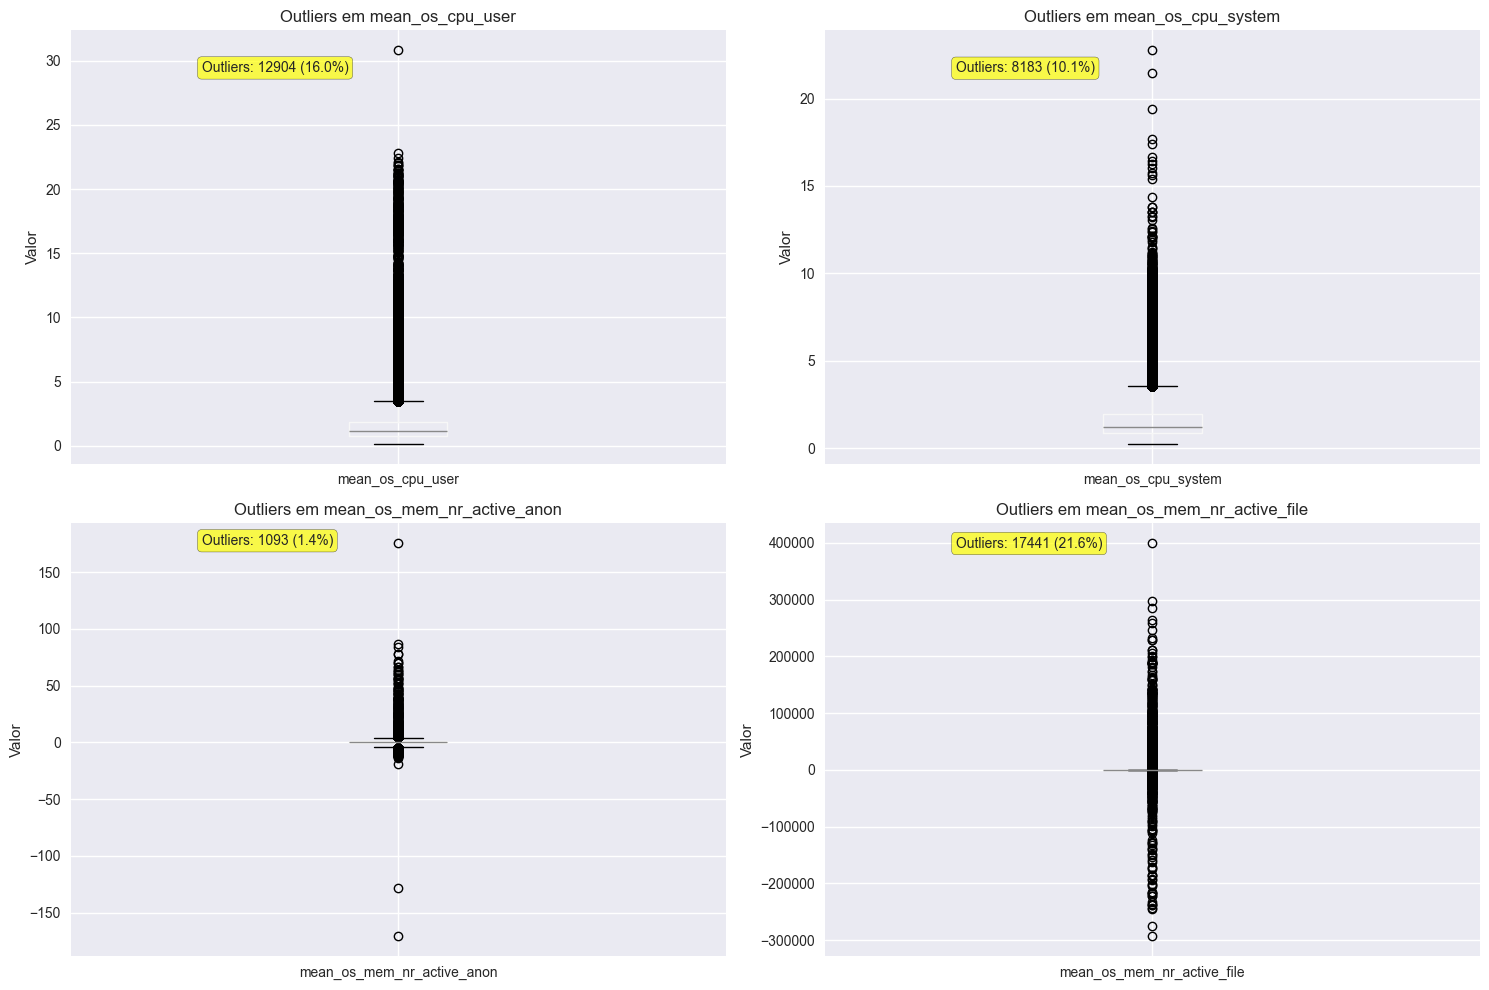

In [13]:
# Detecção de outliers usando IQR
def detectar_outliers_iqr(dados, coluna):
    """Detecta outliers usando o método IQR"""
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = dados[(dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)]
    return outliers, (limite_inferior, limite_superior)

# Selecionar algumas métricas principais para análise de outliers
metricas_para_outliers = []

# Adicionar métricas disponíveis
if metricas_cpu_existentes:
    metricas_para_outliers.extend(metricas_cpu_existentes[:2])
if metricas_memoria_existentes:
    metricas_para_outliers.extend(metricas_memoria_existentes[:2])
if metricas_rede_existentes:
    metricas_para_outliers.extend(metricas_rede_existentes[:2])

print("=== DETECÇÃO DE OUTLIERS ===")

if metricas_para_outliers:
    outlier_summary = {}
    
    for metrica in metricas_para_outliers[:4]:  # Analisar até 4 métricas
        outliers, limites = detectar_outliers_iqr(df, metrica)
        outlier_summary[metrica] = {
            'quantidade': len(outliers),
            'percentual': (len(outliers) / len(df)) * 100,
            'limites': limites
        }
    
    # Resumo de outliers
    print("Resumo de Outliers por Métrica:")
    for metrica, info in outlier_summary.items():
        print(f"{metrica}: {info['quantidade']} outliers ({info['percentual']:.2f}%)")
    
    # Visualização de outliers
    plt.figure(figsize=(15, 10))
    
    for i, metrica in enumerate(list(outlier_summary.keys())[:4], 1):
        plt.subplot(2, 2, i)
        
        # Boxplot para visualizar outliers
        df.boxplot(column=metrica, ax=plt.gca())
        plt.title(f'Outliers em {metrica}')
        plt.ylabel('Valor')
        
        # Adicionar informações sobre outliers
        info = outlier_summary[metrica]
        plt.text(0.7, plt.ylim()[1] * 0.9, 
                f'Outliers: {info["quantidade"]} ({info["percentual"]:.1f}%)',
                transform=plt.gca().transData, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Nenhuma métrica disponível para análise de outliers")

## 6. Análise de Correlações

=== ANÁLISE DE CORRELAÇÕES ===
Analisando correlações entre 10 métricas principais


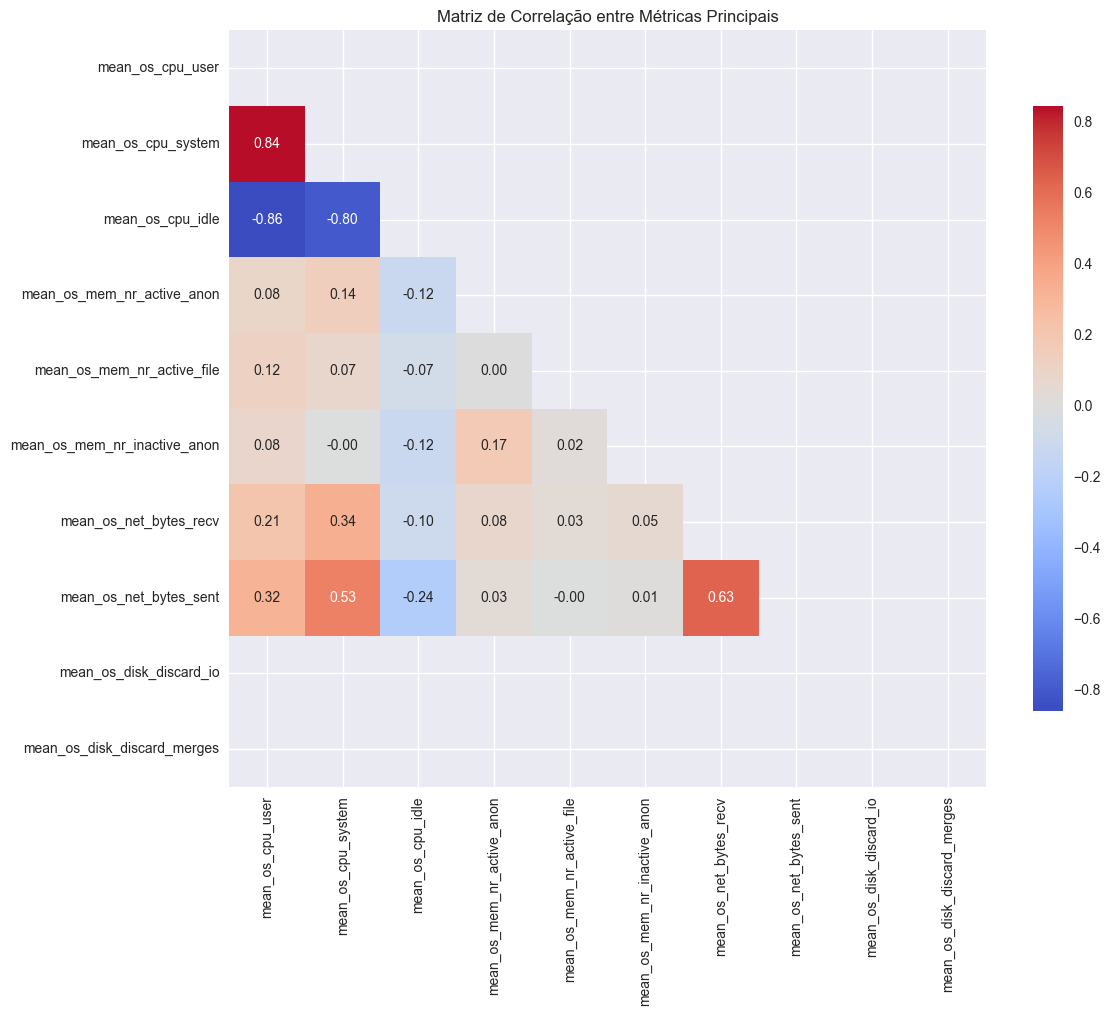


Correlações Fortes (|r| > 0.7):
  mean_os_cpu_user ↔ mean_os_cpu_idle: -0.862
  mean_os_cpu_user ↔ mean_os_cpu_system: 0.844
  mean_os_cpu_system ↔ mean_os_cpu_idle: -0.796


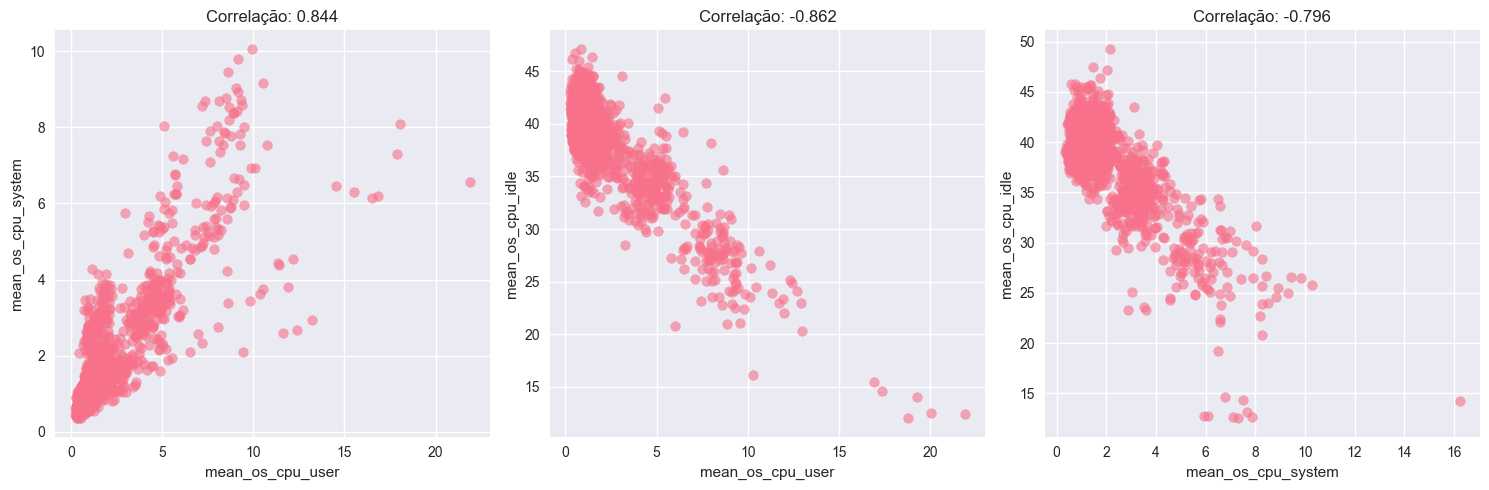

In [14]:
# Análise de correlações entre métricas
print("=== ANÁLISE DE CORRELAÇÕES ===")

# Selecionar um subconjunto de métricas para análise de correlação
metricas_principais = []
if metricas_cpu_existentes:
    metricas_principais.extend(metricas_cpu_existentes[:3])
if metricas_memoria_existentes:
    metricas_principais.extend(metricas_memoria_existentes[:3])
if metricas_rede_existentes:
    metricas_principais.extend(metricas_rede_existentes[:2])

# Adicionar métricas de disco se disponíveis
metricas_disco = [col for col in df.columns if 'disk' in col.lower()]
if metricas_disco:
    metricas_principais.extend(metricas_disco[:2])

if len(metricas_principais) >= 5:
    # Calcular matriz de correlação
    df_correlacao = df[metricas_principais]
    matriz_correlacao = df_correlacao.corr()
    
    print(f"Analisando correlações entre {len(metricas_principais)} métricas principais")
    
    # Visualizar matriz de correlação
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(matriz_correlacao, dtype=bool))
    
    sns.heatmap(matriz_correlacao, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f', cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlação entre Métricas Principais')
    plt.tight_layout()
    plt.show()
    
    # Encontrar as correlações mais fortes
    correlacoes_fortes = []
    for i in range(len(matriz_correlacao.columns)):
        for j in range(i+1, len(matriz_correlacao.columns)):
            corr_value = matriz_correlacao.iloc[i, j]
            if abs(corr_value) > 0.7:  # Correlação forte
                correlacoes_fortes.append({
                    'var1': matriz_correlacao.columns[i],
                    'var2': matriz_correlacao.columns[j],
                    'correlacao': corr_value
                })
    
    if correlacoes_fortes:
        print(f"\nCorrelações Fortes (|r| > 0.7):")
        for corr in sorted(correlacoes_fortes, key=lambda x: abs(x['correlacao']), reverse=True):
            print(f"  {corr['var1']} ↔ {corr['var2']}: {corr['correlacao']:.3f}")
    else:
        print("\nNenhuma correlação forte encontrada (|r| > 0.7)")
        
    # Scatter plots das correlações mais interessantes
    if len(correlacoes_fortes) > 0:
        plt.figure(figsize=(15, 5))
        
        for i, corr in enumerate(correlacoes_fortes[:3], 1):  # Top 3 correlações
            plt.subplot(1, 3, i)
            sample_size = min(2000, len(df))
            df_sample = df.sample(sample_size)
            
            plt.scatter(df_sample[corr['var1']], df_sample[corr['var2']], alpha=0.6)
            plt.xlabel(corr['var1'])
            plt.ylabel(corr['var2'])
            plt.title(f"Correlação: {corr['correlacao']:.3f}")
            
        plt.tight_layout()
        plt.show()
        
else:
    print("Métricas insuficientes para análise de correlação completa")

## 7. Análise por Classes (Normal vs Anomalia)

=== ANÁLISE COMPARATIVA POR CLASSE ===
Classes disponíveis: ['normal' 'interf']

Comparando métricas entre classes:
Estatísticas por classe (primeiras 5 métricas):
       mean_os_cpu_user                            mean_os_cpu_system                            mean_os_cpu_idle                             mean_os_mem_nr_active_anon                             mean_os_mem_nr_active_file                                     
                   mean    std median   min    max               mean    std median   min    max             mean    std median   min     max                       mean    std median    min    max                       mean       std median       min       max
target                                                                                                                                                                                                                                                              
interf            2.449  2.311   1.42  0.20  30.83   

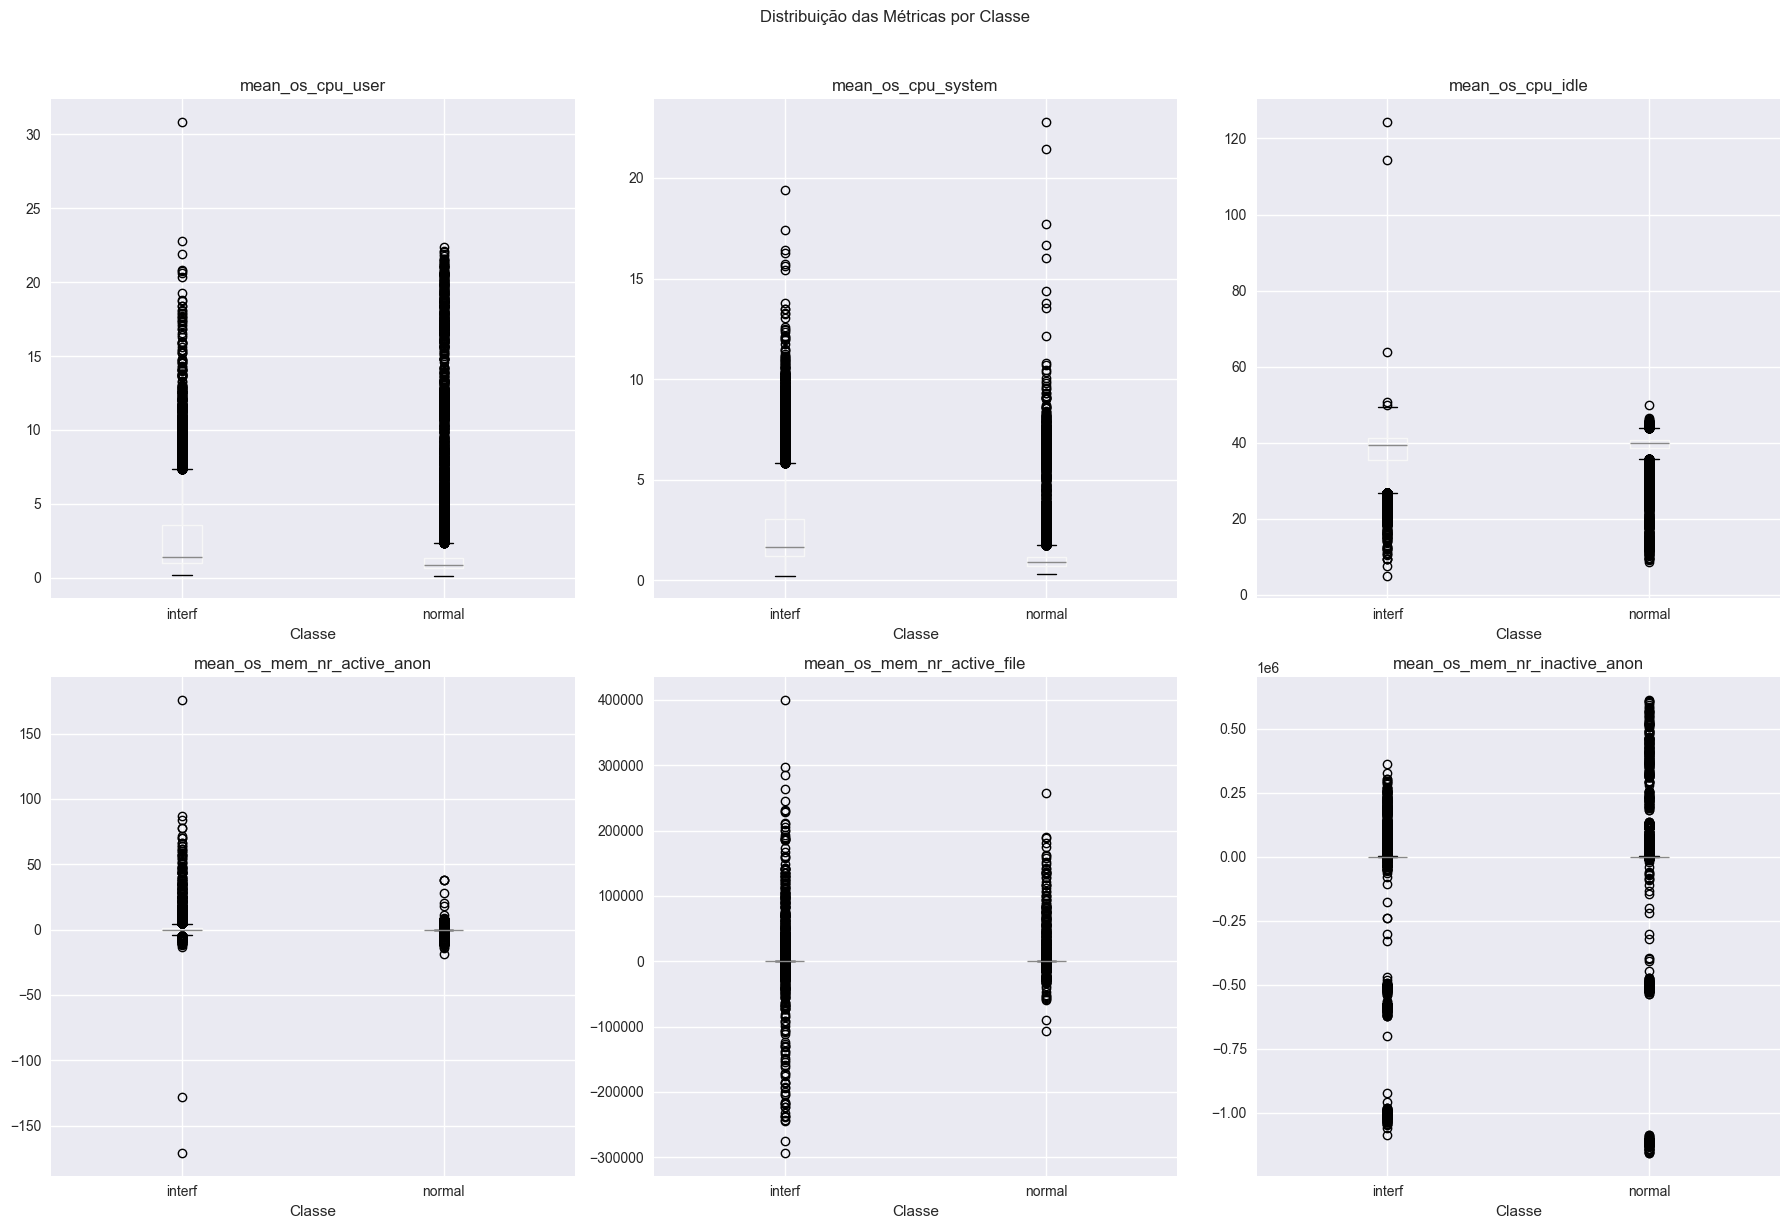


=== TESTES ESTATÍSTICOS ===
Teste Mann-Whitney U entre 'normal' e 'interf':
  mean_os_cpu_user: p-value = 0.000000 ***
  mean_os_cpu_system: p-value = 0.000000 ***
  mean_os_cpu_idle: p-value = 0.000000 ***
  mean_os_mem_nr_active_anon: p-value = 0.011452 *
  mean_os_mem_nr_active_file: p-value = 0.000000 ***

=== DIFERENÇAS MÉDIAS ENTRE CLASSES ===
Maiores diferenças relativas entre classes (%):
  mean_os_mem_nr_active_anon: 25081.2%
  mean_os_cpu_system: 122.0%
  mean_os_cpu_user: 83.0%
  mean_os_net_bytes_sent: 72.3%
  mean_os_mem_nr_active_file: 57.1%


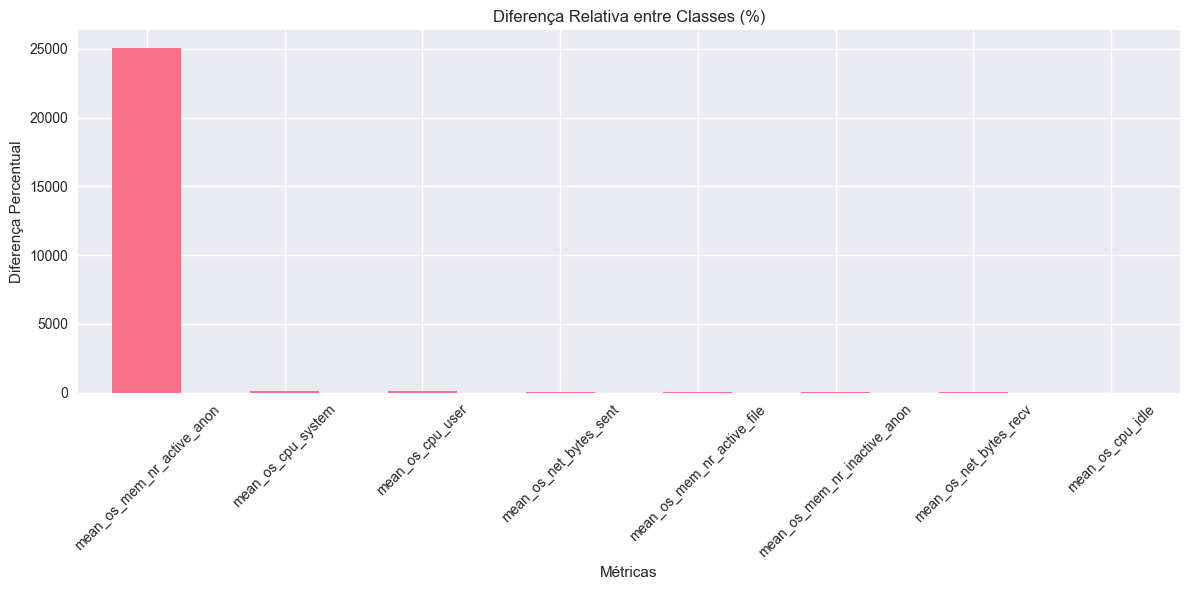

In [15]:
# Análise comparativa entre classes normal e anomalia
if 'target' in df.columns:
    print("=== ANÁLISE COMPARATIVA POR CLASSE ===")
    
    classes_unicas = df['target'].unique()
    print(f"Classes disponíveis: {classes_unicas}")
    
    # Estatísticas por classe para métricas principais
    if metricas_principais:
        print(f"\nComparando métricas entre classes:")
        
        # Estatísticas descritivas por classe
        estatisticas_por_classe = df.groupby('target')[metricas_principais[:5]].agg([
            'mean', 'std', 'median', 'min', 'max'
        ])
        
        print("Estatísticas por classe (primeiras 5 métricas):")
        print(estatisticas_por_classe.round(3))
        
        # Visualizações comparativas
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        axes = axes.ravel()
        
        for i, metrica in enumerate(metricas_principais[:6]):
            df.boxplot(column=metrica, by='target', ax=axes[i])
            axes[i].set_title(f'{metrica}')
            axes[i].set_xlabel('Classe')
        
        plt.suptitle('Distribuição das Métricas por Classe', y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Teste estatístico de diferença entre classes
        print(f"\n=== TESTES ESTATÍSTICOS ===")
        
        from scipy.stats import mannwhitneyu
        
        # Assumindo que temos 2 classes
        if len(classes_unicas) == 2:
            classe1, classe2 = classes_unicas
            
            print(f"Teste Mann-Whitney U entre '{classe1}' e '{classe2}':")
            
            for metrica in metricas_principais[:5]:  # Testar primeiras 5 métricas
                dados_classe1 = df[df['target'] == classe1][metrica]
                dados_classe2 = df[df['target'] == classe2][metrica]
                
                # Remover valores NaN
                dados_classe1 = dados_classe1.dropna()
                dados_classe2 = dados_classe2.dropna()
                
                if len(dados_classe1) > 0 and len(dados_classe2) > 0:
                    statistic, p_value = mannwhitneyu(dados_classe1, dados_classe2)
                    significativo = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
                    
                    print(f"  {metrica}: p-value = {p_value:.6f} {significativo}")
        
        # Análise de importância das features
        print(f"\n=== DIFERENÇAS MÉDIAS ENTRE CLASSES ===")
        
        if len(classes_unicas) == 2:
            classe1, classe2 = classes_unicas
            
            medias_classe1 = df[df['target'] == classe1][metricas_principais[:8]].mean()
            medias_classe2 = df[df['target'] == classe2][metricas_principais[:8]].mean()
            
            diferenca_relativa = ((medias_classe2 - medias_classe1) / medias_classe1 * 100).abs()
            diferenca_relativa = diferenca_relativa.sort_values(ascending=False)
            
            print("Maiores diferenças relativas entre classes (%):")
            for metrica, diff in diferenca_relativa.head(5).items():
                print(f"  {metrica}: {diff:.1f}%")
                
            # Visualizar as diferenças
            plt.figure(figsize=(12, 6))
            diferenca_relativa.head(8).plot(kind='bar')
            plt.title('Diferença Relativa entre Classes (%)')
            plt.xlabel('Métricas')
            plt.ylabel('Diferença Percentual')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
else:
    print("Coluna 'target' não disponível para análise por classes")

## 8. Análise Dimensional e Clustering